In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
folder_path= 'E:\\Case Comp\\NEST\\Training\\'

In [3]:
# Define file paths
files = {
    'study_title_train': folder_path + 'study_title_clinicalbiobert_predictions_train.csv',
    'study_title_test': folder_path + 'study_title_clinicalbiobert_predictions_test.csv',
    'outcomes_train': folder_path + 'outcomes_clinicalbiobert_predictions_train.csv',
    'outcomes_test': folder_path + 'outcomes_clinicalbiobert_predictions_test.csv',
    'conditions_train': folder_path + 'conditions_clinicalbiobert_predictions_train.csv',
    'conditions_test': folder_path + 'conditions_clinicalbiobert_predictions_test.csv',
    'brief_summary_train': folder_path + 'brief_summary_clinicalbiobert_predictions_train.csv',
    'brief_summary_test': folder_path + 'brief_summary_clinicalbiobert_predictions_test.csv'
}

# Read CSV files into pandas DataFrames
df_study_title_train = pd.read_csv(files['study_title_train'])
df_study_title_test = pd.read_csv(files['study_title_test'])
df_outcomes_train = pd.read_csv(files['outcomes_train'])
df_outcomes_test = pd.read_csv(files['outcomes_test'])
df_conditions_train = pd.read_csv(files['conditions_train'])
df_conditions_test = pd.read_csv(files['conditions_test'])
df_brief_summary_train = pd.read_csv(files['brief_summary_train'])
df_brief_summary_test = pd.read_csv(files['brief_summary_test'])

# Example: Display the first few rows of one of the dataframes
df_study_title_train.head()

,NCT Number,True Label,Predicted Label,Probability Class 0,Probability Class 1
0,NCT00559130,1,1,0.030289,0.969711
1,NCT00937664,0,0,0.916095,0.083905
2,NCT00441597,1,1,0.007969,0.992031
3,NCT03296228,1,1,0.013237,0.986763
4,NCT00421603,1,1,0.054834,0.945166


In [4]:
# Step 1: Rename columns to ensure suffixes are applied properly
df_study_title_train_filtered = df_study_title_train[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_study_title'})
df_study_title_test_filtered = df_study_title_test[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_study_title'})

df_outcomes_train_filtered = df_outcomes_train[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_outcomes'})
df_outcomes_test_filtered = df_outcomes_test[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_outcomes'})

df_conditions_train_filtered = df_conditions_train[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_conditions'})
df_conditions_test_filtered = df_conditions_test[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_conditions'})

df_brief_summary_train_filtered = df_brief_summary_train[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_brief_summary'})
df_brief_summary_test_filtered = df_brief_summary_test[['NCT Number', 'True Label', 'Predicted Label']].rename(columns={'Predicted Label': 'Predicted Label_brief_summary'})

# Step 2: Merge the datasets based on NCT Number
train_data = pd.merge(df_study_title_train_filtered, df_outcomes_train_filtered, on=['NCT Number', 'True Label'])
train_data = pd.merge(train_data, df_conditions_train_filtered, on=['NCT Number', 'True Label'])
train_data = pd.merge(train_data, df_brief_summary_train_filtered, on=['NCT Number', 'True Label'])

test_data = pd.merge(df_study_title_test_filtered, df_outcomes_test_filtered, on=['NCT Number', 'True Label'])
test_data = pd.merge(test_data, df_conditions_test_filtered, on=['NCT Number', 'True Label'])
test_data = pd.merge(test_data, df_brief_summary_test_filtered, on=['NCT Number', 'True Label'])

# Display the merged train data to verify column names
train_data.head()

,NCT Number,True Label,Predicted Label_study_title,Predicted Label_outcomes,Predicted Label_conditions,Predicted Label_brief_summary
0,NCT00559130,1,1,0,0,0
1,NCT00937664,0,0,0,0,0
2,NCT00441597,1,1,1,0,1
3,NCT03296228,1,1,1,0,1
4,NCT00421603,1,1,1,0,1


In [5]:
test_data.head()

,NCT Number,True Label,Predicted Label_study_title,Predicted Label_outcomes,Predicted Label_conditions,Predicted Label_brief_summary
0,NCT03162666,0,0,0,0,1
1,NCT04312048,1,1,1,1,1
2,NCT03144778,1,0,0,0,0
3,NCT01592721,1,0,0,0,0
4,NCT04253613,1,1,1,1,1


In [6]:
combined_predictions = pd.read_csv(folder_path + 'combined_predictions.csv')
combined_predictions

,true_label,predicted_class,prob_class_0,prob_class_1,NCT Number,data_split,data_type
0,1,1.0,0.204015,0.795985,NCT04312048,test,model_interventional_non_oncology
1,1,0.0,0.553482,0.446518,NCT01728441,test,model_interventional_non_oncology
2,1,1.0,0.204369,0.795631,NCT00835796,test,model_interventional_non_oncology
3,1,0.0,0.629683,0.370317,NCT01284699,test,model_interventional_non_oncology
4,1,1.0,0.406655,0.593345,NCT00316043,test,model_interventional_non_oncology
...,...,...,...,...,...,...,...
321910,1,1.0,0.241203,0.758797,NCT03642470,train,model_observational_other
321911,1,1.0,0.434165,0.565835,NCT04063397,train,model_observational_other
321912,1,0.0,0.501608,0.498392,NCT01273194,train,model_observational_other
321913,1,0.0,0.526931,0.473069,NCT01128907,train,model_observational_other


In [7]:
# Left join train_data with combined_predictions
train_data = pd.merge(train_data, combined_predictions[['NCT Number', 'predicted_class', 'data_type']], on=['NCT Number'], how='left')

# Left join test_data with combined_predictions
test_data = pd.merge(test_data, combined_predictions[['NCT Number', 'predicted_class', 'data_type']], on=['NCT Number'], how='left')

In [8]:
# Rename 'predicted_class' to 'Predicted Label_others' in train_data
train_data = train_data.rename(columns={'predicted_class': 'Predicted Label_others'})

# Rename 'predicted_class' to 'Predicted Label_others' in test_data
test_data = test_data.rename(columns={'predicted_class': 'Predicted Label_others'})

In [9]:
test_data.isna().sum()

,0
NCT Number,0
True Label,0
Predicted Label_study_title,0
Predicted Label_outcomes,0
Predicted Label_conditions,0
Predicted Label_brief_summary,0
Predicted Label_others,57
data_type,57


In [10]:
# Drop rows with any NaN values from test_data
test_data = test_data.dropna()

# Verify that there are no NaN values left
test_data.isna().sum()

,0
NCT Number,0
True Label,0
Predicted Label_study_title,0
Predicted Label_outcomes,0
Predicted Label_conditions,0
Predicted Label_brief_summary,0
Predicted Label_others,0
data_type,0


In [11]:
# List of columns with predicted labels
predicted_columns = [
    'Predicted Label_study_title',
    'Predicted Label_outcomes',
    'Predicted Label_conditions',
    'Predicted Label_brief_summary',
    'Predicted Label_others'
]

# Loop through each predicted column and print the classification report and confusion matrix
for column in predicted_columns:
    print(f"Classification Report for {column}:")
    print(classification_report(test_data['True Label'], test_data[column]))

    print(f"Confusion Matrix for {column}:")
    print(confusion_matrix(test_data['True Label'], test_data[column]))
    print("\n" + "="*50 + "\n")

Classification Report for Predicted Label_study_title:
              precision    recall  f1-score   support

           0       0.26      0.38      0.31      9206
           1       0.89      0.82      0.85     55132

    accuracy                           0.76     64338
   macro avg       0.58      0.60      0.58     64338
weighted avg       0.80      0.76      0.78     64338

Confusion Matrix for Predicted Label_study_title:
[[ 3532  5674]
 [ 9956 45176]]


Classification Report for Predicted Label_outcomes:
              precision    recall  f1-score   support

           0       0.26      0.43      0.33      9206
           1       0.89      0.80      0.84     55132

    accuracy                           0.75     64338
   macro avg       0.58      0.62      0.59     64338
weighted avg       0.80      0.75      0.77     64338

Confusion Matrix for Predicted Label_outcomes:
[[ 4001  5205]
 [11131 44001]]


Classification Report for Predicted Label_conditions:
              precisio

Overall Classification Report for Final Predictions:
              precision    recall  f1-score   support

           0       0.18      0.73      0.29      9206
           1       0.91      0.45      0.61     55132

    accuracy                           0.49     64338
   macro avg       0.55      0.59      0.45     64338
weighted avg       0.81      0.49      0.56     64338

F3 Score for Class 0: 0.5619
AUC-ROC Score: 0.5925


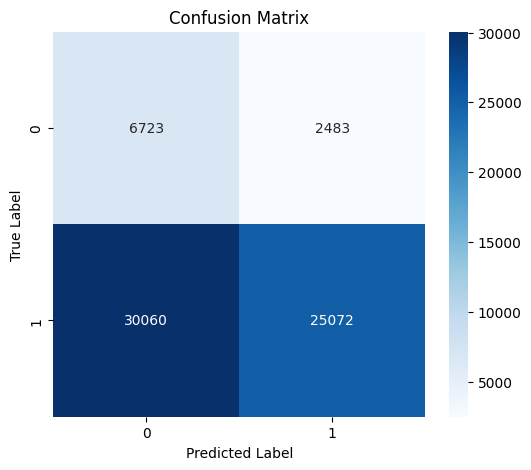

In [25]:
# Initialize a list to store the final predictions
final_predictions = []
final_probabilities = []  # List to store probabilities for AUC-ROC

# Iterate through each row in the test data
for index, row in test_data.iterrows():
    # Get the predicted labels for all the features
    pred_conditions = row['Predicted Label_conditions']
    pred_study_title = row['Predicted Label_study_title']
    pred_outcomes = row['Predicted Label_outcomes']
    pred_brief_summary = row['Predicted Label_brief_summary']
    pred_others = row['Predicted Label_others']

    # Apply the given logic:
    if pred_others == 0:
        final_predictions.append(0)
    else:
        # Check if 4/5 of the remaining predictions are 0
        remaining_predictions = [pred_study_title, pred_outcomes, pred_brief_summary, pred_conditions]
        zero_count = remaining_predictions.count(0)
        
        if zero_count >= 3:  # 4 or more predictions are 0
            final_predictions.append(0)
        else:
            final_predictions.append(1)

# Add final predictions to the dataframe
test_data["Final Prediction"] = final_predictions

# Step 3: Calculate the overall performance using the final predictions
print("Overall Classification Report for Final Predictions:")
print(classification_report(test_data["True Label"], final_predictions))

# Calculate F2 score for class 0 (using beta=3)
f2_score_0 = fbeta_score(test_data["True Label"], final_predictions, beta=3, pos_label=0)
print(f"F3 Score for Class 0: {f2_score_0:.4f}")

# Calculate AUC-ROC score
roc_auc = roc_auc_score(test_data["True Label"], final_predictions)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(test_data["True Label"], final_predictions)

print(conf_matrix)